In [ ]:
pip install -U langchain langchain-mistralai FastAPI langserve langgraph sse_starlette nest-asyncio pyngrok uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: anyio
    Found existing installation: anyio 3.7.1
    Uninstalling anyio-3.7.1:
      Successfully uninstalled anyio-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires anyio<4,>=3.1.0, but you have anyio 4.8.0 which is incompatible.


In [ ]:
import os

os.environ["LANGCHAIN_TRACING"]="true"
os.environ["LANGCHAIN_ENDPOINT"]=
os.environ["LANGCHAIN_API_KEY"]=
os.environ["MISTRAL_API_KEY"] = "

from langchain_mistralai import ChatMistralAI

model = ChatMistralAI(model="mistral-large-latest")


In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage(content="Translate the following from English into Italian"),
    HumanMessage(content="hi!"),
]

model.invoke(messages)

AIMessage(content='Ciao!\n\n Here are a few other translations for "hi" in Italian:\n\n* Salve (formal)\n* Ehi (informal)\n* Ciao a tutti (hi everyone)', additional_kwargs={}, response_metadata={'token_usage': {'prompt_tokens': 15, 'total_tokens': 62, 'completion_tokens': 47}, 'model': 'mistral-large-latest', 'finish_reason': 'stop'}, id='run-81634e0c-469b-490d-ad71-c40c346afad7-0', usage_metadata={'input_tokens': 15, 'output_tokens': 47, 'total_tokens': 62})

In [ ]:
! ngrok config add-authtoken

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
print(ngrok_tunnel.public_url+'/chain/playground')

Public URL: https://3733-35-201-217-169.ngrok-free.app


https://3e83-35-201-217-169.ngrok-free.app/chain/playground


In [ ]:
from fastapi import FastAPI
import uvicorn
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_mistralai import ChatMistralAI
from langserve import add_routes
from langchain_core.runnables import RunnableLambda
import nest_asyncio
from langchain_core.runnables import chain
nest_asyncio.apply()
from typing import Annotated



# Step 1: Create prompt template
system_template = "Translate the following into {language}:"
prompt_template = ChatPromptTemplate.from_messages([
    ('system', system_template),
    ('user', '{text}')
])


# Step 2: Create model
model = ChatMistralAI(model="mistral-large-latest")

# Step 3: Create parser
parser = StrOutputParser()

# Step 4: Create chain

chain = prompt_template | model | parser


# Step 5: App definition
app = FastAPI(
  title="LangChain Server",
  version="1.0",
  description="A simple API server using LangChain's Runnable interfaces",
)

# Step 6: Adding chain route
add_routes(
    app,
    chain,
    path="/chain",
)

if __name__ == "__main__":
    uvicorn.run(app, host='0.0.0.0', port=8000, log_level="debug")

INFO:     Started server process [157]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)



     __          ___      .__   __.   _______      _______. _______ .______     ____    ____  _______
    |  |        /   \     |  \ |  |  /  _____|    /       ||   ____||   _  \    \   \  /   / |   ____|
    |  |       /  ^  \    |   \|  | |  |  __     |   (----`|  |__   |  |_)  |    \   \/   /  |  |__
    |  |      /  /_\  \   |  . `  | |  | |_ |     \   \    |   __|  |      /      \      /   |   __|
    |  `----./  _____  \  |  |\   | |  |__| | .----)   |   |  |____ |  |\  \----.  \    /    |  |____
    |_______/__/     \__\ |__| \__|  \______| |_______/    |_______|| _| `._____|   \__/     |_______|
    
LANGSERVE: Playground for chain "/chain/" is live at:
LANGSERVE:  │
LANGSERVE:  └──> /chain/playground/
LANGSERVE:
LANGSERVE: See all available routes at /docs/
INFO:     2600:4040:2c2e:9a00:48fa:66d2:8cb7:f4e8:0 - "GET /chain/playground HTTP/1.1" 307 Temporary Redirect
INFO:     2600:4040:2c2e:9a00:48fa:66d2:8cb7:f4e8:0 - "GET /chain/playground/ HTTP/1.1" 200 OK
INFO:     2600:40

In [ ]:
from pyngrok import ngrok

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
print(ngrok_tunnel.public_url+'/assistant/')

Public URL: https://d4a1-34-106-125-106.ngrok-free.app
https://d4a1-34-106-125-106.ngrok-free.app/assistant/


In [ ]:
from typing import Annotated
from pydantic import BaseModel


from fastapi import FastAPI
import uvicorn
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_mistralai import ChatMistralAI
from langserve import add_routes
from langchain_core.runnables import RunnableLambda
import nest_asyncio
from langchain_core.runnables import chain

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

nest_asyncio.apply()

class State(TypedDict):
    messages: Annotated[list, add_messages]

model = ChatMistralAI(model="mistral-large-latest")

system_template = """You are a helpful virtual assistant whose job is to answer user queries about the langchain library and building
LLM applications with langraph. If you don't know the answer to a question you should first find to locate the answer on the internet, then ask for feedback
from the user"""
prompt_template = ChatPromptTemplate.from_messages([
  ('system', system_template),
    ('user', '{input}')
])

model = ChatMistralAI(model="mistral-large-latest")

def chatbot(state: State):
  return {"messages": model.invoke(state["messages"])}

def input(question):
  return {"messages": question}

def output(state: State):
  return state["messages"][-1].content

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

assistant = RunnableLambda(input) | graph | RunnableLambda(output)


assistant.invoke(
  "what is langgraph?"
)

'As of my last update in October 2023, there is no widely recognized or widely known tool or concept specifically named "LangGraph." It\'s possible that "LangGraph" could refer to a niche tool, a new development, or a specific project that hasn\'t gained widespread recognition yet.\n\nIf you are referring to a specific tool or concept that is relevant to your field or a particular project, it would be helpful to provide more context. For example, it could be a graph-based tool for language processing, a visualization tool for linguistic data, or something else entirely.\n\nIf you have more details or a specific context in which "LangGraph" is used, I can try to provide a more accurate and detailed explanation.'

In [ ]:
async for chunk in assistant.astream_log("what is langgraph?"):
  print(chunk)

RunLogPatch({'op': 'replace',
  'path': '',
  'value': {'final_output': None,
            'id': '075d0e75-4425-4952-9732-869392bd6a26',
            'logs': {},
            'name': 'RunnableSequence',
            'streamed_output': [],
            'type': 'chain'}})
RunLogPatch({'op': 'add',
  'path': '/logs/input',
  'value': {'end_time': None,
            'final_output': None,
            'id': 'e23eeebe-09b1-4180-9475-1b0b3ba4c6a5',
            'metadata': {},
            'name': 'input',
            'start_time': '2025-02-23T19:43:17.561+00:00',
            'streamed_output': [],
            'streamed_output_str': [],
            'tags': ['seq:step:1'],
            'type': 'chain'}})
RunLogPatch({'op': 'add',
  'path': '/logs/input/streamed_output/-',
  'value': {'content': 'what is langgraph?', 'role': 'user'}})
RunLogPatch({'op': 'add',
  'path': '/logs/input/final_output',
  'value': {'content': 'what is langgraph?', 'role': 'user'}},
 {'op': 'add',
  'path': '/logs/input/end_tim

In [ ]:
pip install datasets GitPython langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
os.environ["HF_TOKEN"]=
os.environ["MISTRAL_API_KEY"] =

In [ ]:
pip install fastembed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.8/324.8 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0


In [ ]:
from git import Repo
from langchain_community.document_loaders import GitLoader
from langchain_core.documents import Document
from langchain_mistralai import MistralAIEmbeddings
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings


try:
  repo = Repo.clone_from(
    "https://github.com/langchain-ai/langchain", to_path="./langchain"
)
except:
  pass
branch = repo.head.reference
loader = GitLoader(
    repo_path="./langchain/",
    file_filter=lambda file_path: file_path.endswith(".py"),branch=branch
)
code = loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(code)

#embeddings = MistralAIEmbeddings(model="mistral-large-latest",timeout=500.0)
embeddings = FastEmbedEmbeddings()

vector_store = InMemoryVectorStore(embeddings)
vector_store.add_documents(all_splits)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

model_optimized.onnx:   0%|          | 0.00/66.5M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
vector_store.similarity_search("what is langchain?")

[]

In [ ]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    context: list

def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["messages"][-1].content)
    return {"context": retrieved_docs, "messages": state["messages"]}

def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    response = model.invoke(state["messages"][-1].content+docs_content)
    return {"messages": response}

def input(question):
  return {"messages": question}

def output(state: State):
  return state["messages"][-1].content

graph_builder = StateGraph(State)
graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("generate", generate)
graph_builder.add_edge(START, "retrieve")
graph_builder.add_edge("retrieve", "generate")
graph_builder.add_edge("generate", END)
graph = graph_builder.compile()

assistant = RunnableLambda(input) | graph | RunnableLambda(output)

assistant.invoke(
  "what are the arguments to the langchain StateGraph constructor?"
)

'As of my last update, LangChain is a framework for developing applications powered by language models. It provides various components and abstractions to facilitate interaction with language models, including chains, prompts, agents, and more.\n\nHowever, there isn\'t a specific "StateGraph" constructor documented in the standard LangChain library. It\'s possible that you might be referring to a custom or less commonly used component, or a newer addition that wasn\'t available at the time of my last update.\n\nIf you are referring to a specific component or a newer addition, you might want to check the official LangChain documentation or the source code repository for the most accurate and up-to-date information.\n\nGenerally, constructors in LangChain components take various arguments depending on the specific class or component. Common arguments might include:\n\n1. **Language Model**: An instance of a language model or its configuration.\n2. **Prompt Templates**: Templates for gene

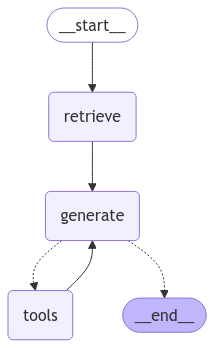

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.types import Command, interrupt
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver

os.environ["TAVILY_API_KEY"] =

class State(TypedDict):
    messages: Annotated[list, add_messages]
    context: list

@tool
def user_feedback(question):
    "get user response to results"
    human_response = interrupt("")
    return {"messages": [human_response["content"]]}


tool = TavilySearchResults(max_results=2)
tools = [tool, user_feedback]

model_with_tools = model.bind_tools(tools)

def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["messages"][-1].content)
    return {"context": retrieved_docs, "messages": state["messages"]}

def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    response = model_with_tools.invoke(state["messages"][-1].content+docs_content)
    assert len(response.tool_calls) <= 1
    return {"messages": [response]}

def input(question):
  return {"messages": [question]}

def output(state: State):
  try:
    return state.get("messages")[-1].content
  except:
    return state


tool_node = ToolNode(tools=tools)

graph_builder = StateGraph(State)
graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("generate", generate)
graph_builder.add_edge(START, "retrieve")
graph_builder.add_edge("retrieve", "generate")
graph_builder.add_node("tools", tool_node)
graph_builder.add_conditional_edges(
    "generate",
    tools_condition,
)
graph_builder.add_edge("tools", "generate")
#graph_builder.add_edge("generate", END)
memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

assistant = RunnableLambda(input) | graph | RunnableLambda(output)


display(Image(graph.get_graph().draw_mermaid_png()))



In [ ]:

config = {"configurable": {"thread_id": "1"}}
events = assistant.stream(
    {"role": "user", "content": "what are the arguments to the langchain StateGraph constructor? Can you ask a human expert please?"},
    config,
)

for event in events:
    print(event)

{'__interrupt__': (Interrupt(value='', resumable=True, ns=['tools:05bcda18-a1ad-f851-9215-591a935a313b'], when='during'),)}


In [ ]:
config = {"configurable": {"thread_id": "1"}}
assistant.invoke("what are the arguments to the langchain StateGraph constructor? Can you ask a human expert please?",config)

''

In [ ]:

config = {"configurable": {"thread_id": "1"}}
events = assistant.stream(
    {"role": "user", "content": "what are the arguments to the langchain StateGraph constructor? Can you search the internet please?"},
    config,
)

for event in events:
    print(event)

[{'tools': {'messages': [ToolMessage(content='[{"url": "https://langchain-ai.github.io/langgraphjs/reference/classes/langgraph.StateGraph.html", "content": "import {  type BaseMessage,  AIMessage,  HumanMessage,} from \\"@langchain/core/messages\\";import { StateGraph, Annotation } from \\"@langchain/langgraph\\";// Define a state with a single key named \\"messages\\" that will// combine a returned BaseMessage or arrays of BaseMessagesconst StateAnnotation = Annotation.Root({  sentiment: Annotation<string>,  messages: Annotation<BaseMessage[]>({    reducer: (left: BaseMessage[], right: BaseMessage | BaseMessage[]) => {      if (Array.isArray(right)) {        return left.concat(right);      }      return left.concat([right]);    },    default: () => [],  }),});const graphBuilder = new StateGraph(StateAnnotation);// A node in the graph that returns an object with a \\"messages\\" key// will update the state by combining the existing value with the returned one.const myNode = (state: typ

In [ ]:
config = {"configurable": {"thread_id": "1"}}
assistant.invoke("what are the arguments to the langchain StateGraph constructor? Can you search the internet please?",config)

'The code snippets provided demonstrate how to define and work with state graphs in LangChain\'s LangGraphJS library. Here\'s a detailed explanation of the key components and how they work together:\n\n### Key Components\n\n1. **Imports**:\n   - `BaseMessage`, `AIMessage`, `HumanMessage` from `@langchain/core/messages`: These are used to define different types of messages.\n   - `StateGraph`, `Annotation` from `@langchain/langgraph`: These are core components for defining and managing the state graph.\n\n2. **State Annotation**:\n   - `StateAnnotation` is defined using `Annotation.Root`. It includes a `sentiment` field and a `messages` field.\n   - The `messages` field is an array of `BaseMessage` objects. It has a reducer function that concatenates new messages with the existing ones and a default function that initializes it as an empty array.\n\n3. **Graph Builder**:\n   - `graphBuilder` is an instance of `StateGraph` initialized with `StateAnnotation`.\n   - `myNode` is a function 

In [ ]:
snapshot = graph.get_state(config)
snapshot.next

('tools',)

In [ ]:
human_response = "The arguments to StateGraph are a and b"

events = graph.stream(Command(resume={"content":human_response}), config)
for event in events:
    print(event)



{'tools': {'messages': [ToolMessage(content='{"messages": ["The arguments to StateGraph are a and b"]}', name='user_feedback', id='4485f500-8c28-4688-9232-c3037dd166bb', tool_call_id='DN4Aqy8tZ')]}}
{'generate': {'messages': [AIMessage(content="It seems like you're referring to a function or method called `StateGraph` that takes two arguments, `a` and `b`. However, without additional context, it's challenging to provide a specific response.\n\nCould you please provide more details or clarify your question? For instance:\n- What is `StateGraph` in this context?\n- What types of values are `a` and `b` expected to be?\n- Is there a specific programming language or framework you're working with?\n\nProviding more information will help me give you a more accurate and helpful response.", additional_kwargs={}, response_metadata={'token_usage': {'prompt_tokens': 175, 'total_tokens': 301, 'completion_tokens': 126}, 'model': 'mistral-large-latest', 'finish_reason': 'stop'}, id='run-e32a252c-c2c9

In [ ]:

app = FastAPI(
  title="LangChain Server",
  version="1.0",
  description="A simple API server using LangChain's Runnable interfaces",
)


add_routes(
    app,
    assistant.with_types(input_type=str,output_type=str),
    path="/assistant",
)

if __name__ == "__main__":
    uvicorn.run(app, host='0.0.0.0', port=8000, log_level="debug")



INFO:     Started server process [315]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)



     __          ___      .__   __.   _______      _______. _______ .______     ____    ____  _______
    |  |        /   \     |  \ |  |  /  _____|    /       ||   ____||   _  \    \   \  /   / |   ____|
    |  |       /  ^  \    |   \|  | |  |  __     |   (----`|  |__   |  |_)  |    \   \/   /  |  |__
    |  |      /  /_\  \   |  . `  | |  | |_ |     \   \    |   __|  |      /      \      /   |   __|
    |  `----./  _____  \  |  |\   | |  |__| | .----)   |   |  |____ |  |\  \----.  \    /    |  |____
    |_______/__/     \__\ |__| \__|  \______| |_______/    |_______|| _| `._____|   \__/     |_______|
    
LANGSERVE: Playground for chain "/assistant/" is live at:
LANGSERVE:  │
LANGSERVE:  └──> /assistant/playground/
LANGSERVE:
LANGSERVE: See all available routes at /docs/
INFO:     34.83.48.132:0 - "POST /assistant/invoke HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [315]
